In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data

X_train = np.loadtxt("data/seconds_1.5_overlap_0/data_Train.txt")
y_train = np.loadtxt("labels/seconds_1.5_overlap_0/labels_Train.txt")

X_val = np.loadtxt("data/seconds_1.5_overlap_0/data_Validation.txt")
y_val = np.loadtxt("labels/seconds_1.5_overlap_0/labels_Validation.txt")

X_test = np.loadtxt("data/seconds_1.5_overlap_0/data_Test.txt")
y_test = np.loadtxt("labels/seconds_1.5_overlap_0/labels_Test.txt")

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2979456, 44)
(708480, 44)
(712320, 44)


In [4]:
X_train = X_train.reshape((-1, 128, 44))
X_val = X_val.reshape((-1, 128, 44))
X_test = X_test.reshape((-1, 128, 44))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(23277, 128, 44)
(5535, 128, 44)
(5565, 128, 44)


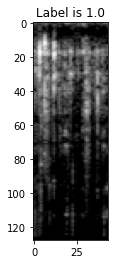

In [5]:
index = 16000

plt.imshow(X_train[index], cmap ="gray")
plt.title(f"Label is {y_train[index]}")
plt.show()

In [6]:
# resizing images

#data_padded = [data[i] for i in range(0, data.shape[0])]

#n_samples = data.shape[0]
#height = data.shape[1]
#width = data.shape[2]


#for i in range(0, n_samples):
#    for j in range(width, height):
#        data_padded[i] = np.append(data_padded[i], [[0] for k in range(0, height)], 1)
    
#data_padded = np.array(data_padded)
#data_padded.shape
#data = data_padded

In [7]:
X_train = X_train.reshape((-1, 128, 44, 1))
X_val = X_val.reshape((-1, 128, 44, 1))
X_test = X_test.reshape((-1, 128, 44, 1))

In [8]:
# train test split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

(array([11032.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12245.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

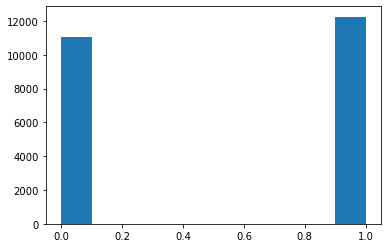

In [9]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6),
                        strides=1,
                        activation="relu",
                        input_shape=(128, 44, 1)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 39, 32)       1184      
_________________________________________________________________
dropout (Dropout)            (None, 123, 39, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 153504)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 153505    
Total params: 154,689
Trainable params: 154,689
Non-trainable params: 0
_________________________________________________________________


In [11]:
# normalize

X_train = X_train.astype("float32")/255.0
X_test = X_train.astype("float32")/255.0

In [12]:
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=36,
    batch_size=256,
    validation_data=(X_val, y_val),
)

Epoch 1/36
91/91 [==============================] - 29s 322ms/step - loss: 0.5035 - accuracy: 0.7959 - val_loss: 20.1400 - val_accuracy: 0.8488
Epoch 2/36
91/91 [==============================] - 30s 330ms/step - loss: 0.2245 - accuracy: 0.9152 - val_loss: 77.9648 - val_accuracy: 0.7736
Epoch 3/36
91/91 [==============================] - 30s 330ms/step - loss: 0.1433 - accuracy: 0.9482 - val_loss: 29.3666 - val_accuracy: 0.9046
Epoch 4/36
91/91 [==============================] - 30s 325ms/step - loss: 0.1173 - accuracy: 0.9579 - val_loss: 42.2448 - val_accuracy: 0.8811
Epoch 5/36
91/91 [==============================] - 29s 314ms/step - loss: 0.0963 - accuracy: 0.9646 - val_loss: 23.3653 - val_accuracy: 0.9362
Epoch 6/36
91/91 [==============================] - 28s 312ms/step - loss: 0.0828 - accuracy: 0.9695 - val_loss: 23.5782 - val_accuracy: 0.9375
Epoch 7/36
91/91 [==============================] - 28s 313ms/step - loss: 0.0744 - accuracy: 0.9727 - val_loss: 14.9062 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()